In [34]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [36]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [37]:
match1 = df2[(df2['team1'] == 'Mumbai Indians') & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & (df2['team2'] == 'Mumbai Indians')]

Match1 = Mumbai Home Ground

Match2 = Hyderabad Home Ground

# Overall Mumbai vs Hyderabad:

In [38]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date           team1                team2  \
46     47    2017  Hyderabad  2017-05-08  Mumbai Indians  Sunrisers Hyderabad   
422   423    2013  Hyderabad  2013-05-01  Mumbai Indians  Sunrisers Hyderabad   
540   541    2015     Mumbai  2015-04-25  Mumbai Indians  Sunrisers Hyderabad   
587   588    2016  Hyderabad  2016-04-18  Mumbai Indians  Sunrisers Hyderabad   
642  7900    2018  Hyderabad    12/04/18  Mumbai Indians  Sunrisers Hyderabad   

             toss_winner toss_decision  result  dl_applied  \
46        Mumbai Indians           bat  normal           0   
422       Mumbai Indians           bat  normal           0   
540       Mumbai Indians           bat  normal           0   
587  Sunrisers Hyderabad         field  normal           0   
642  Sunrisers Hyderabad         field  normal           0   

                  winner  win_by_runs  win_by_wickets player_of_match  \
46   Sunrisers Hyderabad            0               7        S Dhawan   
422  Sunrisers Hyderabad            0               7        I Sharma   
540       Mumbai Indians           20               0      SL Malinga   
587  Sunrisers Hyderabad            0               7       DA Warner   
642  Sunrisers Hyderabad            0               1     Rashid Khan   

                                         venue                umpire1  \
46   Rajiv Gandhi International Stadium, Uppal  KN Ananthapadmanabhan   
422  Rajiv Gandhi International Stadium, Uppal              Asad Rauf   
540                           Wankhede Stadium        HDPK Dharmasena   
587  Rajiv Gandhi International Stadium, Uppal        HDPK Dharmasena   
642  Rajiv Gandhi International Stadium, Uppal               O Nandan   

         umpire2          umpire3  
46     M Erasmus              NaN  
422     S Asnani              NaN  
540  CB Gaffaney              NaN  
587    VK Sharma              NaN  
642  Nigel Llong  Vineet Kulkarni

Matches played between Hyderabad and Mumbai.

In [39]:
match.shape

(14, 18)

In [40]:
match['winner'].value_counts()

Sunrisers Hyderabad    7
Mumbai Indians         7
Name: winner, dtype: int64

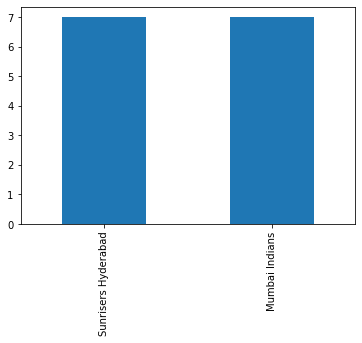

In [41]:
match['winner'].value_counts().plot.bar()
plt.show()

**Hyderabad and Mumbai both won 7 times each against each other.**

In [42]:
match['toss_winner'].value_counts()

Mumbai Indians         8
Sunrisers Hyderabad    6
Name: toss_winner, dtype: int64

In [43]:
match['toss_decision'].value_counts()

field    7
bat      7
Name: toss_decision, dtype: int64

In [44]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Mumbai Indians         3
Sunrisers Hyderabad    2
Name: winner, dtype: int64

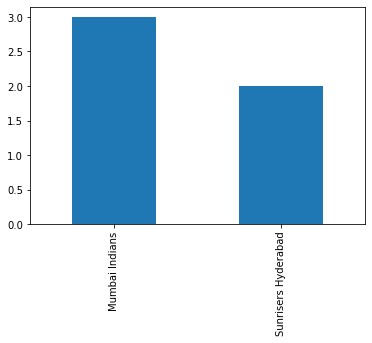

In [45]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

**Mumbai won the toss and won the match 3 times whereas Hyderabad won 2 times. So winning toss doesn't have much affect to winning the match.**

In [46]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team    bowling_team  over  ball  \
2116        10       1  Sunrisers Hyderabad  Mumbai Indians     1     1   
2117        10       1  Sunrisers Hyderabad  Mumbai Indians     1     2   
2118        10       1  Sunrisers Hyderabad  Mumbai Indians     1     3   
2119        10       1  Sunrisers Hyderabad  Mumbai Indians     1     4   
2120        10       1  Sunrisers Hyderabad  Mumbai Indians     1     5   

       batsman non_striker           bowler  is_super_over  ...  bye_runs  \
2116  S Dhawan   DA Warner  Harbhajan Singh              0  ...         0   
2117  S Dhawan   DA Warner  Harbhajan Singh              0  ...         0   
2118  S Dhawan   DA Warner  Harbhajan Singh              0  ...         0   
2119  S Dhawan   DA Warner  Harbhajan Singh              0  ...         0   
2120  S Dhawan   DA Warner  Harbhajan Singh              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
2116            0            0             0             0           0   
2117            0            0             0             0           0   
2118            0            0             0             0           0   
2119            0            0             0             0           0   
2120            0            0             0             1           0   

      total_runs  player_dismissed dismissal_kind fielder  
2116           0               NaN            NaN     NaN  
2117           0               NaN            NaN     NaN  
2118           0               NaN            NaN     NaN  
2119           0               NaN            NaN     NaN  
2120           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Mumbai.

In [47]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Which batsman will have the highest 'Stamina Score' at the end of the match:

In [104]:
batsman = ['DA Warner', 'V Shankar', 'KS Williamson', 'WP Saha', 'MK Pandey', 'J Bairstow', 'RG Sharma', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'Ishan Kishan', 'Q de Kock']
ss_dict = {}
for j in batsman:
    ss_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        balls = list(delivery[(delivery['match_id'] == k) & ((delivery['batsman'] == j) | (delivery['non_striker'] == j))]['ball'])
        total_wide_runs = list(delivery[(delivery['match_id'] == k) & ((delivery['batsman'] == j) | (delivery['non_striker'] == j))]['wide_runs'])
        total_run = np.sum(batsman_runs)
        total_ball = len(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        balls_in_crease = len(balls)
        ss = -999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        for i in range(len(balls)):
            if total_wide_runs[i] > 0:
                balls_in_crease -= 1
        if total_run > 15:
            ss = ((without_boundary_run/(boundary_run+1)) + (total_ball/(balls_in_crease+1)))/total_run
        else:
            ss = -999
        if ss != -999:
            ss_list.append(ss)
    if len(ss_list) != 0:
        ss_dict[j] = ss_list
for k,v in ss_dict.items():
    ss_dict[k] = np.mean(v)
ss_dict

{'DA Warner': 0.03151193052330288,
 'KS Williamson': 0.03053968253968254,
 'WP Saha': 0.046107226107226104,
 'MK Pandey': 0.3695658116586626,
 'J Bairstow': 0.04640468227424749,
 'RG Sharma': 0.04692483986921463,
 'KA Pollard': 0.024589284783713944,
 'KH Pandya': 0.04637461097536214,
 'HH Pandya': 0.042046035805626596,
 'Ishan Kishan': 0.08455882352941177,
 'Q de Kock': 0.041015452109194175}

These are the Stamina Score of all the current batsmen of Hyderabad and Mumbai in SRH vs MI match till now.

In [105]:
max_ss = np.max(list(ss_dict.values()))
min_ss = np.min(list(ss_dict.values()))
normalised_ss_dict = {}
for i in ss_dict:
    normalised_ss_dict[i] = (ss_dict[i] - min_ss)/(max_ss - min_ss)
normalised_ss_dict

{'DA Warner': 0.020067005144666968,
 'KS Williamson': 0.017248703295472536,
 'WP Saha': 0.06237508829495594,
 'MK Pandey': 1.0,
 'J Bairstow': 0.06323733874925774,
 'RG Sharma': 0.06474514451122976,
 'KA Pollard': 0.0,
 'KH Pandya': 0.06315016963326671,
 'HH Pandya': 0.05060272123453951,
 'Ishan Kishan': 0.17383657748817308,
 'Q de Kock': 0.04761531885743227}

These are the normalised Stamina Score of all the current batsmen of Hyderabad and Mumbai in SRH vs MI match till now.

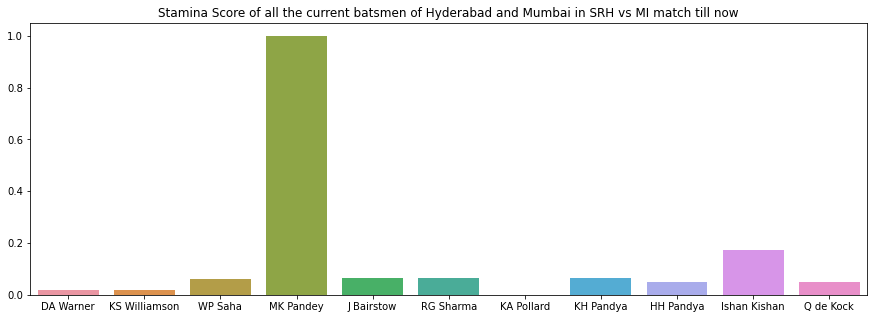

In [106]:
stamina_score = pd.Series(list(normalised_ss_dict.values()),index = list(normalised_ss_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = stamina_score.index, y =stamina_score, ax = ax)
plt.title('Stamina Score of all the current batsmen of Hyderabad and Mumbai in SRH vs MI match till now')
plt.show()

**Manish Pandey has the highest Stamina Score in Hyderabad vs Mumbai match among all current Hyderabad and Mumbai batsmen followed by Ishan Kishan till now.**

In [107]:
batsman_overall = ['DA Warner', 'V Shankar', 'KS Williamson', 'WP Saha', 'MK Pandey', 'J Bairstow', 'JO Holder', 'Mohammad Nabi', 'RG Sharma', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'Ishan Kishan', 'Q de Kock', 'SS Tiwary', 'SA Yadav']
ss_dict_overall = {}
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    ss_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        balls = list(df1[(df1['match_id'] == k) & ((df1['batsman'] == j) | (df1['non_striker'] == j))]['ball'])
        total_wide_runs = list(df1[(df1['match_id'] == k) & ((df1['batsman'] == j) | (df1['non_striker'] == j))]['wide_runs'])
        total_run = np.sum(batsman_runs)
        total_ball = len(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        balls_in_crease = len(balls)
        ss = -999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        for i in range(len(balls)):
            if total_wide_runs[i] > 0:
                balls_in_crease -= 1
        if total_run > 15:
            ss = ((without_boundary_run/(boundary_run+1)) + (total_ball/(balls_in_crease+1)))/total_run
        else:
            ss = -999
        if ss != -999:
            ss_list.append(ss)
    if len(ss_list) != 0:
        ss_dict_overall[j] = ss_list
for k,v in ss_dict_overall.items():
    ss_dict_overall[k] = np.mean(v)
ss_dict_overall

{'DA Warner': 0.03152650913877712,
 'V Shankar': 0.055908748202166764,
 'KS Williamson': 0.0406236472552233,
 'WP Saha': 0.07615891577917014,
 'MK Pandey': 0.08013178454065914,
 'J Bairstow': 0.023942872223937525,
 'JO Holder': 0.047807017543859645,
 'Mohammad Nabi': 0.04178277317183968,
 'RG Sharma': 0.04861833872876891,
 'KA Pollard': 0.04332561292942306,
 'KH Pandya': 0.0480207555198049,
 'HH Pandya': 0.03991264645880867,
 'Ishan Kishan': 0.03726353205331061,
 'Q de Kock': 0.03383780062272911,
 'SS Tiwary': 0.05481902843597633,
 'SA Yadav': 0.061169739143441156}

These are the Stamina Score of all the current batsmen of Hyderabad and Mumbai in overall IPL till now.

In [108]:
max_ss_overall = np.max(list(ss_dict_overall.values()))
min_ss_overall = np.min(list(ss_dict_overall.values()))
normalised_ss_dict_overall = {}
for i in ss_dict_overall:
    normalised_ss_dict_overall[i] = (ss_dict_overall[i] - min_ss_overall)/(max_ss_overall - min_ss_overall)
normalised_ss_dict_overall

{'DA Warner': 0.1349667861889317,
 'V Shankar': 0.5689000669392974,
 'KS Williamson': 0.2968695129256246,
 'WP Saha': 0.929294435544596,
 'MK Pandey': 1.0,
 'J Bairstow': 0.0,
 'JO Holder': 0.4247127117429578,
 'Mohammad Nabi': 0.31749859914254047,
 'RG Sharma': 0.43915188045895054,
 'KA Pollard': 0.34495668106601346,
 'KH Pandya': 0.4285166290485727,
 'HH Pandya': 0.2842157567467024,
 'Ishan Kishan': 0.2370691882108012,
 'Q de Kock': 0.17610108455235024,
 'SS Tiwary': 0.5495062093033286,
 'SA Yadav': 0.6625304777153526}

These are the normalised Stamina Score of all the current batsmen of Hyderabad and Mumbai in overall IPL till now.

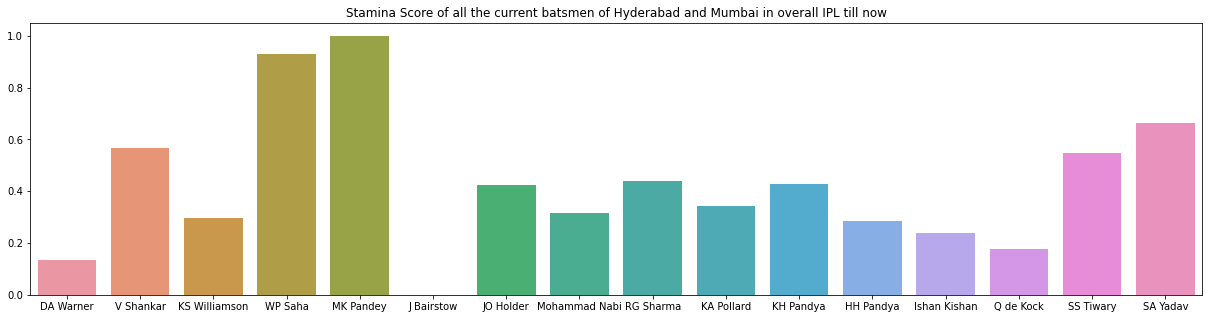

In [109]:
stamina_score_overall = pd.Series(list(normalised_ss_dict_overall.values()),index = list(normalised_ss_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(21,5))
sns.barplot(x = stamina_score_overall.index, y =stamina_score_overall, ax = ax)
plt.title('Stamina Score of all the current batsmen of Hyderabad and Mumbai in overall IPL till now')
plt.show()

**Manish Pandey has the highest Stamina Score in overall IPL among all current Hyderabad and Mumbai batsmen followed by Wriddhiman Saha till now.**

## Which batsman will have the highest 'Smash Rate':

In [110]:
batsman = ['DA Warner', 'V Shankar', 'KS Williamson', 'WP Saha', 'MK Pandey', 'J Bairstow', 'Mohammad Nabi', 'RG Sharma', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'Ishan Kishan', 'Q de Kock']
sr_dict = {}
for j in batsman:
    sr_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_ball = len(batsman_runs)
        boundary = 0
        sr = -999
        for i in batsman_runs:
            if i >= 4:
                boundary += 1
        if total_ball > 0:
            sr= (boundary/total_ball)*100
        else:
            sr = -999
        if sr != -999:
            sr_list.append(sr)
    if len(sr_list) != 0:
        sr_dict[j] = sr_list
for k,v in sr_dict.items():
    sr_dict[k] = np.mean(v)
sr_dict

{'DA Warner': 20.14647664062704,
 'V Shankar': 4.423076923076923,
 'KS Williamson': 11.931818181818182,
 'WP Saha': 15.416666666666666,
 'MK Pandey': 15.262330754352028,
 'J Bairstow': 30.0,
 'Mohammad Nabi': 16.984126984126984,
 'RG Sharma': 17.642428582278203,
 'KA Pollard': 14.074650185252779,
 'KH Pandya': 21.35393342289894,
 'HH Pandya': 4.591836734693877,
 'Ishan Kishan': 14.285714285714285,
 'Q de Kock': 12.452107279693486}

These are the Smash Rate of all the current batsmen of Hyderabad and Mumbai in SRH vs MI match till now.

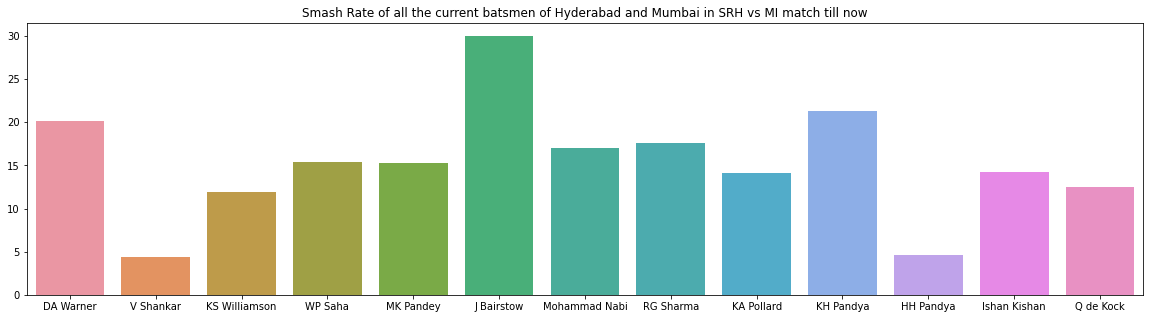

In [112]:
smash_rate= pd.Series(list(sr_dict.values()),index = list(sr_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = smash_rate.index, y =smash_rate, ax = ax)
plt.title('Smash Rate of all the current batsmen of Hyderabad and Mumbai in SRH vs MI match till now')
plt.show()

**Johnny Bairstow has the highest Smash Rate in Hyderabad vs Mumbai match among all current Hyderabad and Mumbai batsmen followed by Krunal Pandya and David Warner till now.**

In [57]:
batsman_overall = ['DA Warner', 'V Shankar', 'KS Williamson', 'WP Saha', 'MK Pandey', 'J Bairstow', 'JO Holder', 'Mohammad Nabi', 'RG Sharma', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'Ishan Kishan', 'Q de Kock', 'SS Tiwary', 'SA Yadav']
sr_dict_overall = {}
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    sr_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_ball = len(batsman_runs)
        boundary = 0
        sr = -999
        for i in batsman_runs:
            if i >= 4:
                boundary += 1
        if total_ball > 0:
            sr= (boundary/total_ball)*100
        else:
            sr = -999
        if sr != -999:
            sr_list.append(sr)
    if len(sr_list) != 0:
        sr_dict_overall[j] = sr_list
for k,v in sr_dict_overall.items():
    sr_dict_overall[k] = np.mean(v)
sr_dict_overall

{'DA Warner': 16.908669870082853,
 'V Shankar': 12.098060472657895,
 'KS Williamson': 14.143458648015999,
 'WP Saha': 14.550257883073744,
 'MK Pandey': 11.422444505549159,
 'J Bairstow': 19.651706884652913,
 'JO Holder': 12.3015873015873,
 'Mohammad Nabi': 21.37728937728938,
 'RG Sharma': 13.82316824071778,
 'KA Pollard': 15.845953178652746,
 'KH Pandya': 17.587822603107323,
 'HH Pandya': 18.509895392333288,
 'Ishan Kishan': 15.66659878199609,
 'Q de Kock': 16.705232914083318,
 'SS Tiwary': 10.696847623094918,
 'SA Yadav': 19.302521878446985}

These are the Smash Rate of all the current batsmen of Hyderabad and Mumbai in overall IPL till now.

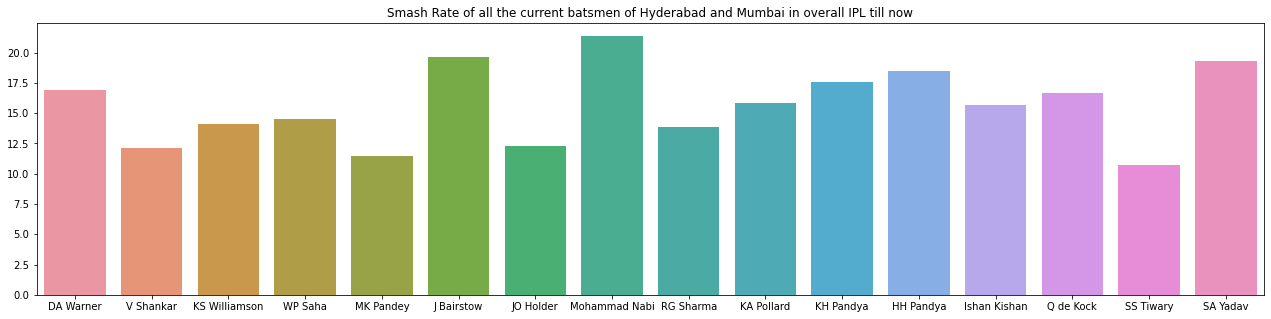

In [102]:
smash_rate_overall = pd.Series(list(sr_dict_overall.values()),index = list(sr_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(22,5))
sns.barplot(x = smash_rate_overall.index, y =smash_rate_overall, ax = ax)
plt.title('Smash Rate of all the current batsmen of Hyderabad and Mumbai in overall IPL till now')
plt.show()

**Mohammad Nabi has the highest Smash Rate in Hyderabad vs Mumbai match among all current Hyderabad and Mumbai batsmen followed by Johnny Bairstow and Surya Kumar Yadav till now.**

## Which bowler will have the best 'Boundary Leaker':

In [59]:
bl_dict = {}
bowlers = ['Rashid Khan', 'Mohammad Nabi', 'S Kaul', 'Sandeep Sharma', 'B Stanlake', 'Basil Thampi', 'K Ahmed', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'DS Kulkarni', 'KA Pollard', 'RD Chahar']
for j in bowlers:
    bl_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['batsman_runs'])
        wide_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        no_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        total_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        boundary_count = 0
        bl = -999
        for i in range(len(batsman_runs)):
            if wide_balls[i] != 0 or no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] >= 4:
                boundary_count += 1
        if legal_balls > 0:
            bl = 1 / (legal_balls / (boundary_count+1))
        else:
            bl = -999
        if bl != -999:
            bl_list.append(bl)
    if len(bl_list) != 0:
        bl_dict[j] = bl_list
for k,v in bl_dict.items():
    bl_dict[k] = np.mean(v)
bl_dict

{'Rashid Khan': 0.12885802469135801,
 'Mohammad Nabi': 0.13194444444444445,
 'S Kaul': 0.17708333333333334,
 'Sandeep Sharma': 0.1388888888888889,
 'B Stanlake': 0.375,
 'Basil Thampi': 0.19128787878787878,
 'K Ahmed': 0.3333333333333333,
 'JJ Bumrah': 0.17867996201329536,
 'MJ McClenaghan': 0.22534013605442177,
 'HH Pandya': 0.28125,
 'KH Pandya': 0.15277777777777776,
 'DS Kulkarni': 0.29166666666666663,
 'KA Pollard': 0.26666666666666666,
 'RD Chahar': 0.14583333333333331}

These are the Boundary Leaker of all the current bowlers of Hyderabad and Mumbai in Hyderabad vs Mumbai match till now.

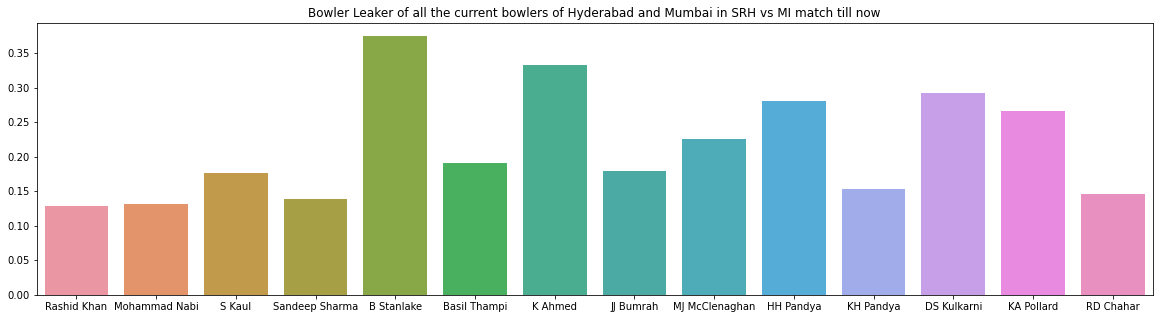

In [60]:
boundary_leaker = pd.Series(list(bl_dict.values()),index = list(bl_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = boundary_leaker.index, y =boundary_leaker, ax = ax)
plt.title('Bowler Leaker of all the current bowlers of Hyderabad and Mumbai in SRH vs MI match till now')
plt.show()

**Billy Stanlake is the highest Bowler Leaker in Hyderabad vs Mumbai match among all current Hyderabad and Mumbai bowlers followed by Khaleel Ahmed and Dhawal Kulkarni till now.**

But this year Stanlake, Kulkarni didn't play a single match.

In [61]:
bl_dict_overall = {}
bowlers_overall = ['Rashid Khan', 'Mohammad Nabi', 'S Kaul', 'Sandeep Sharma', 'B Stanlake', 'Basil Thampi', 'K Ahmed', 'JO Holder', 'V Shankar', 'S Nadeem', 'T Natarajan', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'DS Kulkarni', 'KA Pollard', 'RD Chahar', 'J Yadav', 'NM Coulter-Nile', 'TA Boult']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
for j in bowlers_overall:
    bl_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['batsman_runs'])
        wide_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        no_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        total_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        boundary_count = 0
        bl = -999
        for i in range(len(batsman_runs)):
            if wide_balls[i] != 0 or no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] >= 4:
                boundary_count += 1
        if legal_balls > 0:
            bl = 1 / (legal_balls / (boundary_count+1))
        else:
            bl = -999
        if bl != -999:
            bl_list.append(bl)
    if len(bl_list) != 0:
        bl_dict_overall[j] = bl_list
for k,v in bl_dict_overall.items():
    bl_dict_overall[k] = np.mean(v)
bl_dict_overall

{'Rashid Khan': 0.1680756843800322,
 'Mohammad Nabi': 0.1951146679407549,
 'S Kaul': 0.23520592397403994,
 'Sandeep Sharma': 0.2299299105607155,
 'B Stanlake': 0.23611111111111113,
 'Basil Thampi': 0.26462937647148177,
 'K Ahmed': 0.25163398692810457,
 'JO Holder': 0.2664141414141414,
 'V Shankar': 0.40705128205128205,
 'S Nadeem': 0.1976478494623656,
 'T Natarajan': 0.3298611111111111,
 'JJ Bumrah': 0.19945216399761856,
 'MJ McClenaghan': 0.2489124272897565,
 'HH Pandya': 0.2863425925925926,
 'KH Pandya': 0.19410752934586104,
 'DS Kulkarni': 0.2775145243282498,
 'KA Pollard': 0.278725526873675,
 'RD Chahar': 0.1935185185185185,
 'J Yadav': 0.18171296296296294,
 'NM Coulter-Nile': 0.23465079365079367,
 'TA Boult': 0.2592592592592593}

These are the Boundary Leaker of all the current bowlers of Hyderabad and Mumbai in overall IPL till now.

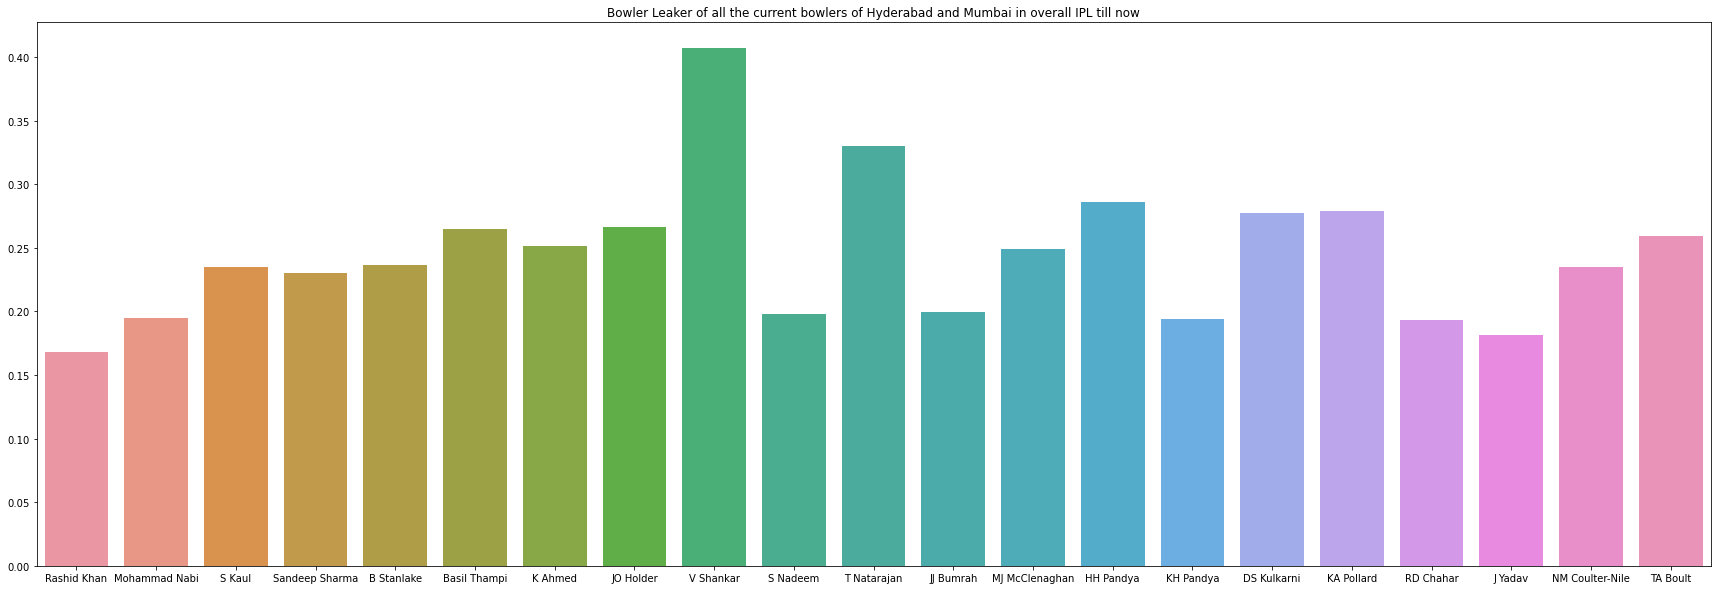

In [73]:
boundary_leaker_overall = pd.Series(list(bl_dict_overall.values()),index = list(bl_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = boundary_leaker_overall.index, y =boundary_leaker_overall, ax = ax)
plt.title('Bowler Leaker of all the current bowlers of Hyderabad and Mumbai in overall IPL till now')
plt.show()

**Vijay Shankar is the highest Bowler Leaker in Hyderabad vs Mumbai match among all current Hyderabad and Mumbai bowlers followed by T Natarajan and Hardik Pandya till now.**

## How many wickets will fall in totall during the match:

In [63]:
total_wickets_fallen = delivery['player_dismissed'].count()
total_wickets_fallen

170

Total 170 wickets fallen in Hyderabad vs Mumbai match till now.

In [64]:
avg_wicket_fallen = np.round(total_wickets_fallen/len(ids))
avg_wicket_fallen

12.0

12 wickets in an average fallen in Hyderabad vs Mumbai match till now.

In [65]:
total_matches_Hyderabad_batting_first_Mumbai_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Sunrisers Hyderabad')]['match_id'].unique())
len(total_matches_Hyderabad_batting_first_Mumbai_batting_second)

7

Hyderabad batted in first innings in 7 matches against Mumbai.

In [66]:
total_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second = 0
for i in total_matches_Hyderabad_batting_first_Mumbai_batting_second:
    total_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second += delivery[(delivery['match_id'] == i)]['player_dismissed'].count()
total_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second

83

Total 83 wickets fallen when Hyderabad batted in first inning and Mumbai batted in second inning.

In [67]:
avg_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second = np.round(total_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second/len(total_matches_Hyderabad_batting_first_Mumbai_batting_second))
avg_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second

12.0

12 wickets in an average fallen per match when Hyderabad batted in first inning and Mumbai batted in second inning.

In [68]:
total_matches_Mumbai_batting_first_Hyderabad_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Mumbai Indians')]['match_id'].unique())
len(total_matches_Mumbai_batting_first_Hyderabad_batting_second)

7

Hyderabad batted in second innings in 7 matches against Mumbai.

In [69]:
total_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second = 0
for i in total_matches_Mumbai_batting_first_Hyderabad_batting_second:
    total_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second += delivery[(delivery['match_id'] == i)]['player_dismissed'].count()
total_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second

87

Total 87 wickets fallen when Mumbai batted in first inning and Hyderabad batted in second inning.

In [70]:
avg_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second = np.round(total_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second/len(total_matches_Mumbai_batting_first_Hyderabad_batting_second))
avg_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second

12.0

12 wickets in an average fallen per match when Mumbai batted in first inning and Hyderabad batted in second inning.

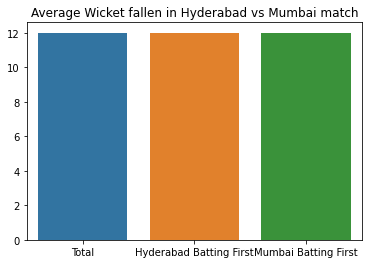

In [71]:
avg_wickets_per_match = pd.Series([avg_wicket_fallen,avg_wickets_fallen_Hyderabad_batting_first_Mumbai_batting_second,avg_wickets_fallen_Mumbai_batting_first_Hyderabad_batting_second],index=['Total','Hyderabad Batting First','Mumbai Batting First'])
sns.barplot(x=avg_wickets_per_match.index,y=avg_wickets_per_match)
plt.title('Average Wicket fallen in Hyderabad vs Mumbai match')
plt.show()

**So 12 more/less wickets fallen in Hyderabad vs Mumbai match till now.**